In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from scipy import stats

In [2]:
smartphones_df = pd.read_csv(r"..\dataset\smartphones.csv")

<h1>Real World Smartphone's Dataset</h1>

In [3]:
# Get the number of rows and columns in the "smartphhone" data frame
print("Number of rows (instances): ", smartphones_df.shape[0])
print("Number of columns (attributes): ", smartphones_df.shape[1])

Number of rows (instances):  980
Number of columns (attributes):  22


In [4]:
# Will show the first few rows of the data frame
smartphones_df.head()

,brand_name,model,price,avg_rating,5G_or_not,processor_brand,num_cores,processor_speed,battery_capacity,fast_charging_available,...,internal_memory,screen_size,refresh_rate,num_rear_cameras,os,primary_camera_rear,primary_camera_front,extended_memory_available,resolution_height,resolution_width
0,apple,Apple iPhone 11,38999,7.3,0,bionic,6.0,2.65,3110.0,0,...,64,6.1,60,2,ios,12.0,12.0,0,1792,828
1,apple,Apple iPhone 11 (128GB),46999,7.5,0,bionic,6.0,2.65,3110.0,0,...,128,6.1,60,2,ios,12.0,12.0,0,1792,828
2,apple,Apple iPhone 11 Pro Max,109900,7.7,0,bionic,6.0,2.65,3500.0,1,...,64,6.5,60,3,ios,12.0,12.0,0,2688,1242
3,apple,Apple iPhone 12,51999,7.4,1,bionic,6.0,3.10,NaN,0,...,64,6.1,60,2,ios,12.0,12.0,0,2532,1170
4,apple,Apple iPhone 12 (128GB),55999,7.5,1,bionic,6.0,3.10,NaN,0,...,128,6.1,60,2,ios,12.0,12.0,0,2532,1170


<h1>About this file</h1>

The data was gathered using web scraping from reputable online sources, ensuring accuracy and relevance. Each entry includes essential attributes such as smartphone model, brand, operating system, release date, display size, processor, RAM, internal storage, camera details, battery capacity, connectivity options, additional features, and market price.

In [5]:
# Getting the information about the DataFrame, including column names, data types, and non-null counts
smartphones_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980 entries, 0 to 979
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   brand_name                 980 non-null    object 
 1   model                      980 non-null    object 
 2   price                      980 non-null    int64  
 3   avg_rating                 879 non-null    float64
 4   5G_or_not                  980 non-null    int64  
 5   processor_brand            960 non-null    object 
 6   num_cores                  974 non-null    float64
 7   processor_speed            938 non-null    float64
 8   battery_capacity           969 non-null    float64
 9   fast_charging_available    980 non-null    int64  
 10  fast_charging              769 non-null    float64
 11  ram_capacity               980 non-null    int64  
 12  internal_memory            980 non-null    int64  
 13  screen_size                980 non-null    float64

In [6]:
print("All of the brand names:\n", np.sort(smartphones_df['brand_name'].unique()))
print("Number of brand_names:", smartphones_df['brand_name'].unique().size)

All of the brand names:
 ['apple' 'asus' 'blackview' 'blu' 'cat' 'cola' 'doogee' 'duoqin' 'gionee'
 'google' 'honor' 'huawei' 'ikall' 'infinix' 'iqoo' 'itel' 'jio' 'lava'
 'leeco' 'leitz' 'lenovo' 'letv' 'lg' 'lyf' 'micromax' 'motorola' 'nokia'
 'nothing' 'nubia' 'oneplus' 'oppo' 'oukitel' 'poco' 'realme' 'redmi'
 'royole' 'samsung' 'sharp' 'sony' 'tcl' 'tecno' 'tesla' 'vertu' 'vivo'
 'xiaomi' 'zte']
Number of brand_names: 46


In [7]:
# Number of models for each brand 
brand_count = smartphones_df.brand_name.value_counts().reset_index()
brand_count.head()

,index,brand_name
0,xiaomi,134
1,samsung,132
2,vivo,111
3,realme,97
4,oppo,88


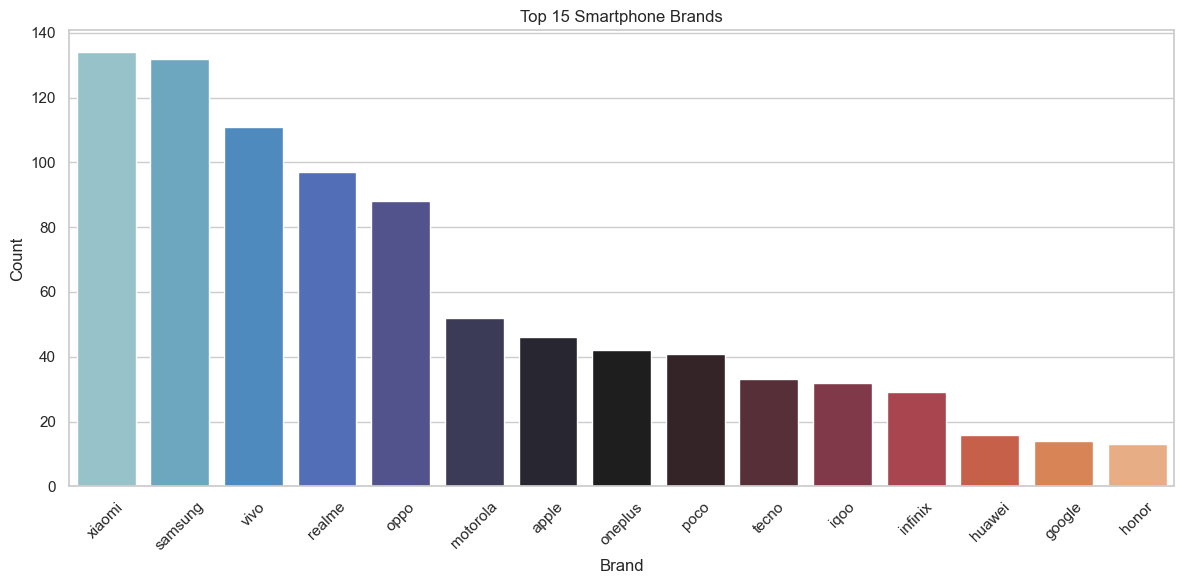

In [8]:
# Calculate the counts of each brand
brand_counts = smartphones_df['brand_name'].value_counts()

# Select the top 15 brands
top_brands = brand_counts.head(15)

sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))
sns.barplot(x=top_brands.index, y=top_brands.values, palette="icefire")
plt.title('Top 15 Smartphone Brands')
plt.xlabel('Brand')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [9]:
print("All of the moodles:\n", np.sort(smartphones_df['model'].unique()))
print("Number of models:\n", smartphones_df['model'].unique().size)

All of the moodles:
 ['Apple iPhone 11' 'Apple iPhone 11 (128GB)' 'Apple iPhone 11 Pro Max'
 'Apple iPhone 12' 'Apple iPhone 12 (128GB)' 'Apple iPhone 12 (256GB)'
 'Apple iPhone 12 Mini' 'Apple iPhone 12 Mini (128GB)'
 'Apple iPhone 12 Mini (256GB)' 'Apple iPhone 12 Pro (256GB)'
 'Apple iPhone 12 Pro (512GB)' 'Apple iPhone 13' 'Apple iPhone 13 (256GB)'
 'Apple iPhone 13 (512GB)' 'Apple iPhone 13 Mini' 'Apple iPhone 13 Pro'
 'Apple iPhone 13 Pro (1TB)' 'Apple iPhone 13 Pro (256GB)'
 'Apple iPhone 13 Pro Max' 'Apple iPhone 13 Pro Max (1TB)'
 'Apple iPhone 13 Pro Max (256GB)' 'Apple iPhone 14'
 'Apple iPhone 14 (256GB)' 'Apple iPhone 14 (512GB)'
 'Apple iPhone 14 Mini' 'Apple iPhone 14 Plus'
 'Apple iPhone 14 Plus (256GB)' 'Apple iPhone 14 Plus (512GB)'
 'Apple iPhone 14 Pro' 'Apple iPhone 14 Pro (1TB)'
 'Apple iPhone 14 Pro (256GB)' 'Apple iPhone 14 Pro Max'
 'Apple iPhone 14 Pro Max (1TB)' 'Apple iPhone 14 Pro Max (256GB)'
 'Apple iPhone 14 Pro Max (512GB)' 'Apple iPhone 15'
 'Apple iPh

In [10]:
# average price for each brand 
avg_price = smartphones_df.groupby('brand_name')['price'].mean().reset_index()
avg_price = avg_price.sort_values(by='price',ascending=False)
avg_price.head()

,brand_name,price
42,vertu,650000.000000
35,royole,129999.000000
19,leitz,124990.000000
0,apple,95966.521739
11,huawei,80177.250000


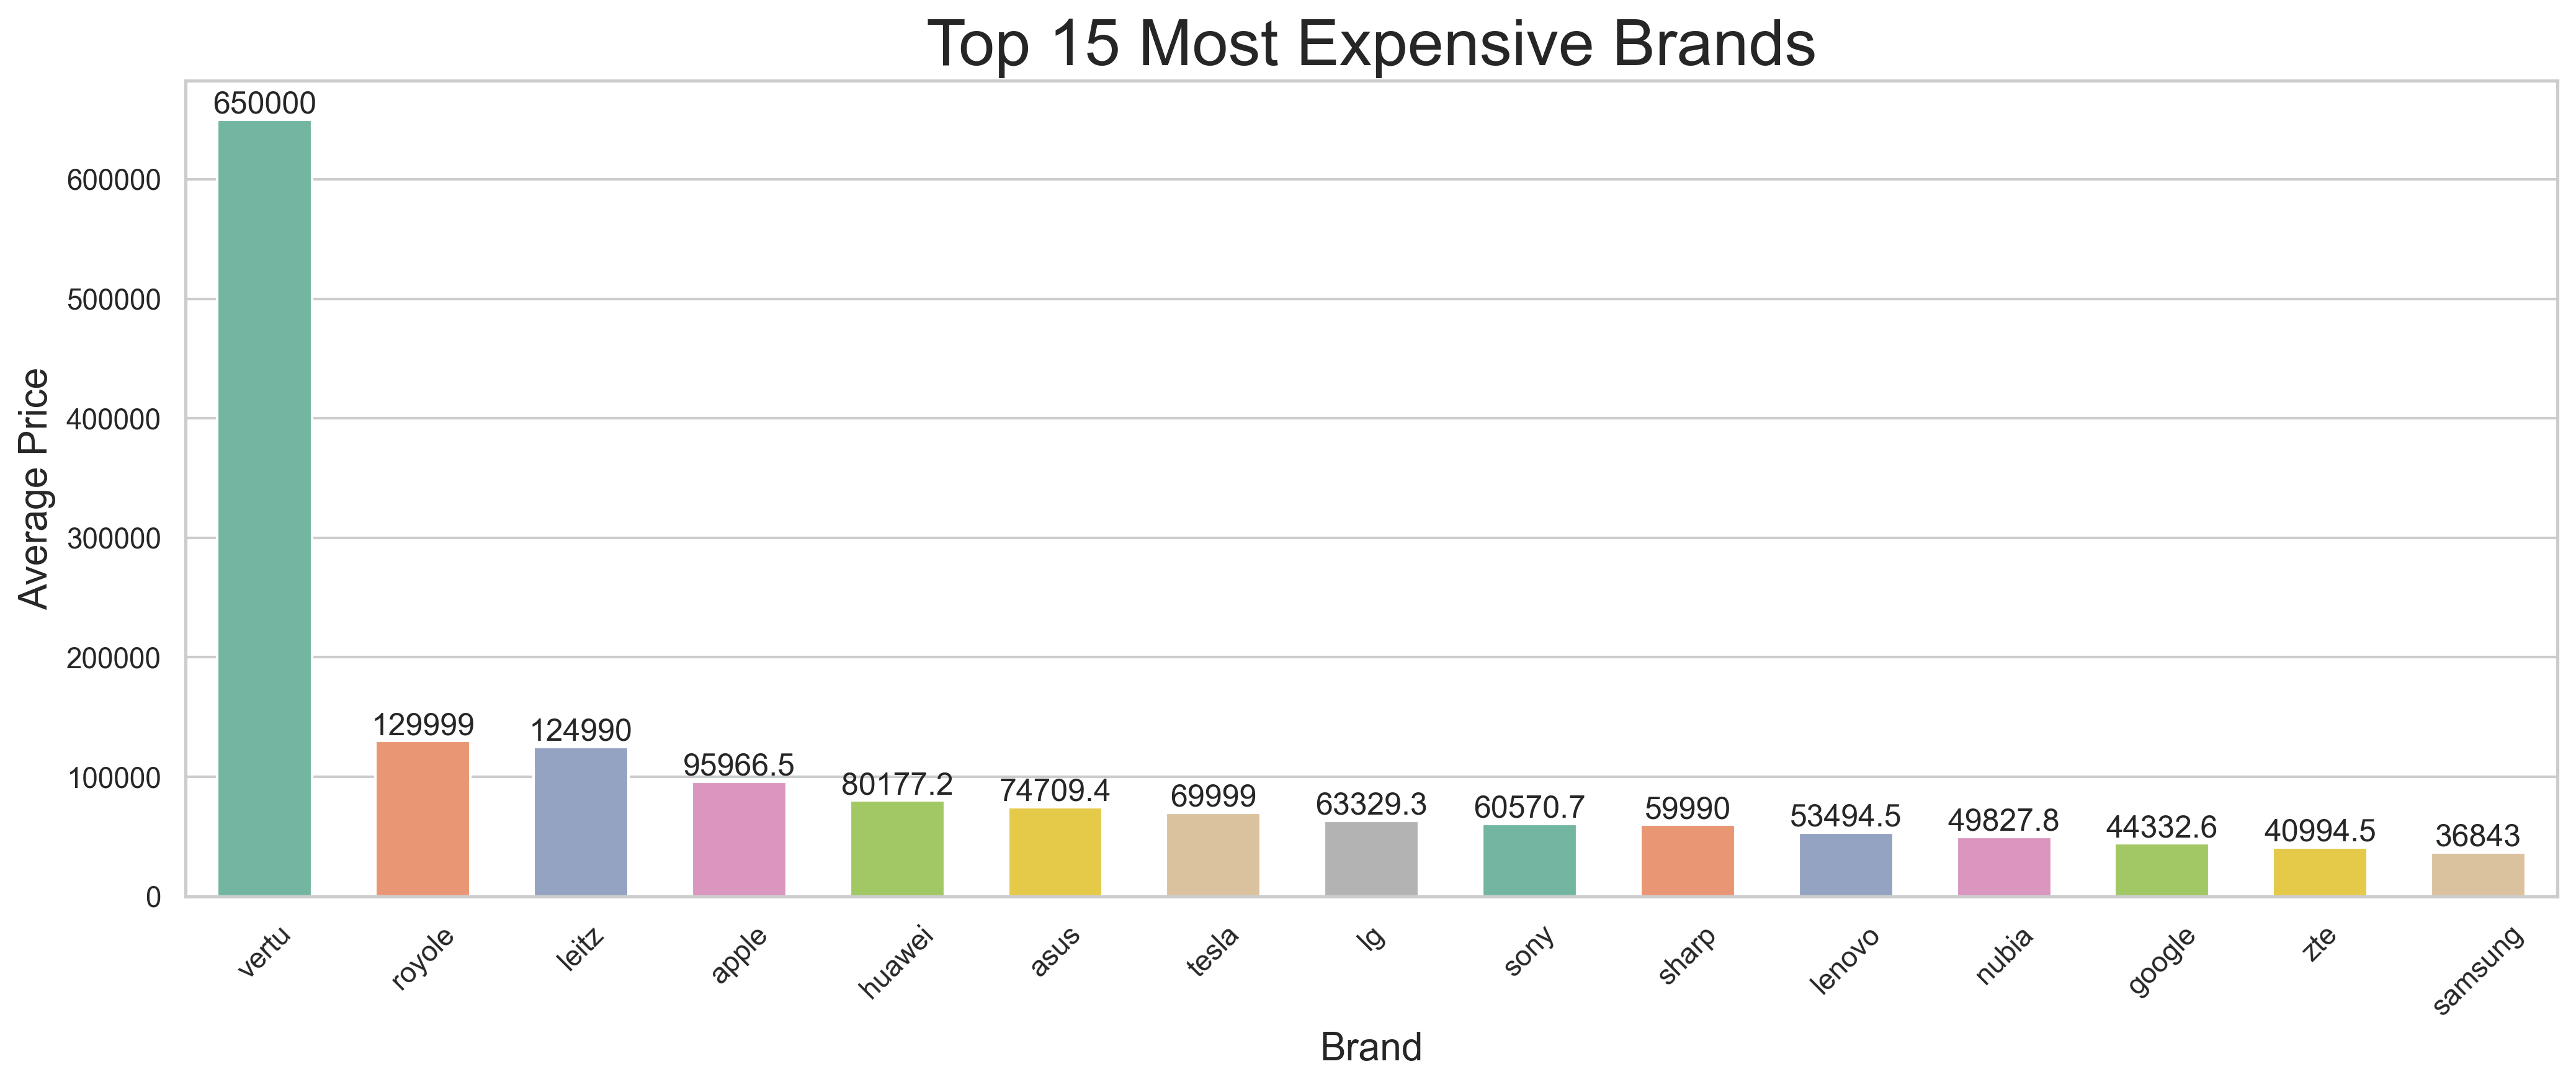

In [11]:
# plot for top 15 most expensive brands
plt.figure(figsize=(14, 6), dpi=300)

top_15_expensive_brands = avg_price.head(15)


ax = sns.barplot(data=top_15_expensive_brands, x='brand_name', y='price', palette='Set2', width=0.6)
ax.bar_label(ax.containers[0])

plt.xlabel('Brand', fontsize=15)
plt.ylabel('Average Price', fontsize=15)
plt.title('Top 15 Most Expensive Brands', fontsize=25)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [12]:
# average rating for each brand 
avg_rating = smartphones_df.groupby('brand_name')['avg_rating'].mean().reset_index()
avg_rating = avg_rating.sort_values(by='avg_rating',ascending=False)
avg_rating.head()

,brand_name,avg_rating
19,leitz,8.9
37,sharp,8.8
20,lenovo,8.8
1,asus,8.7
22,lg,8.7


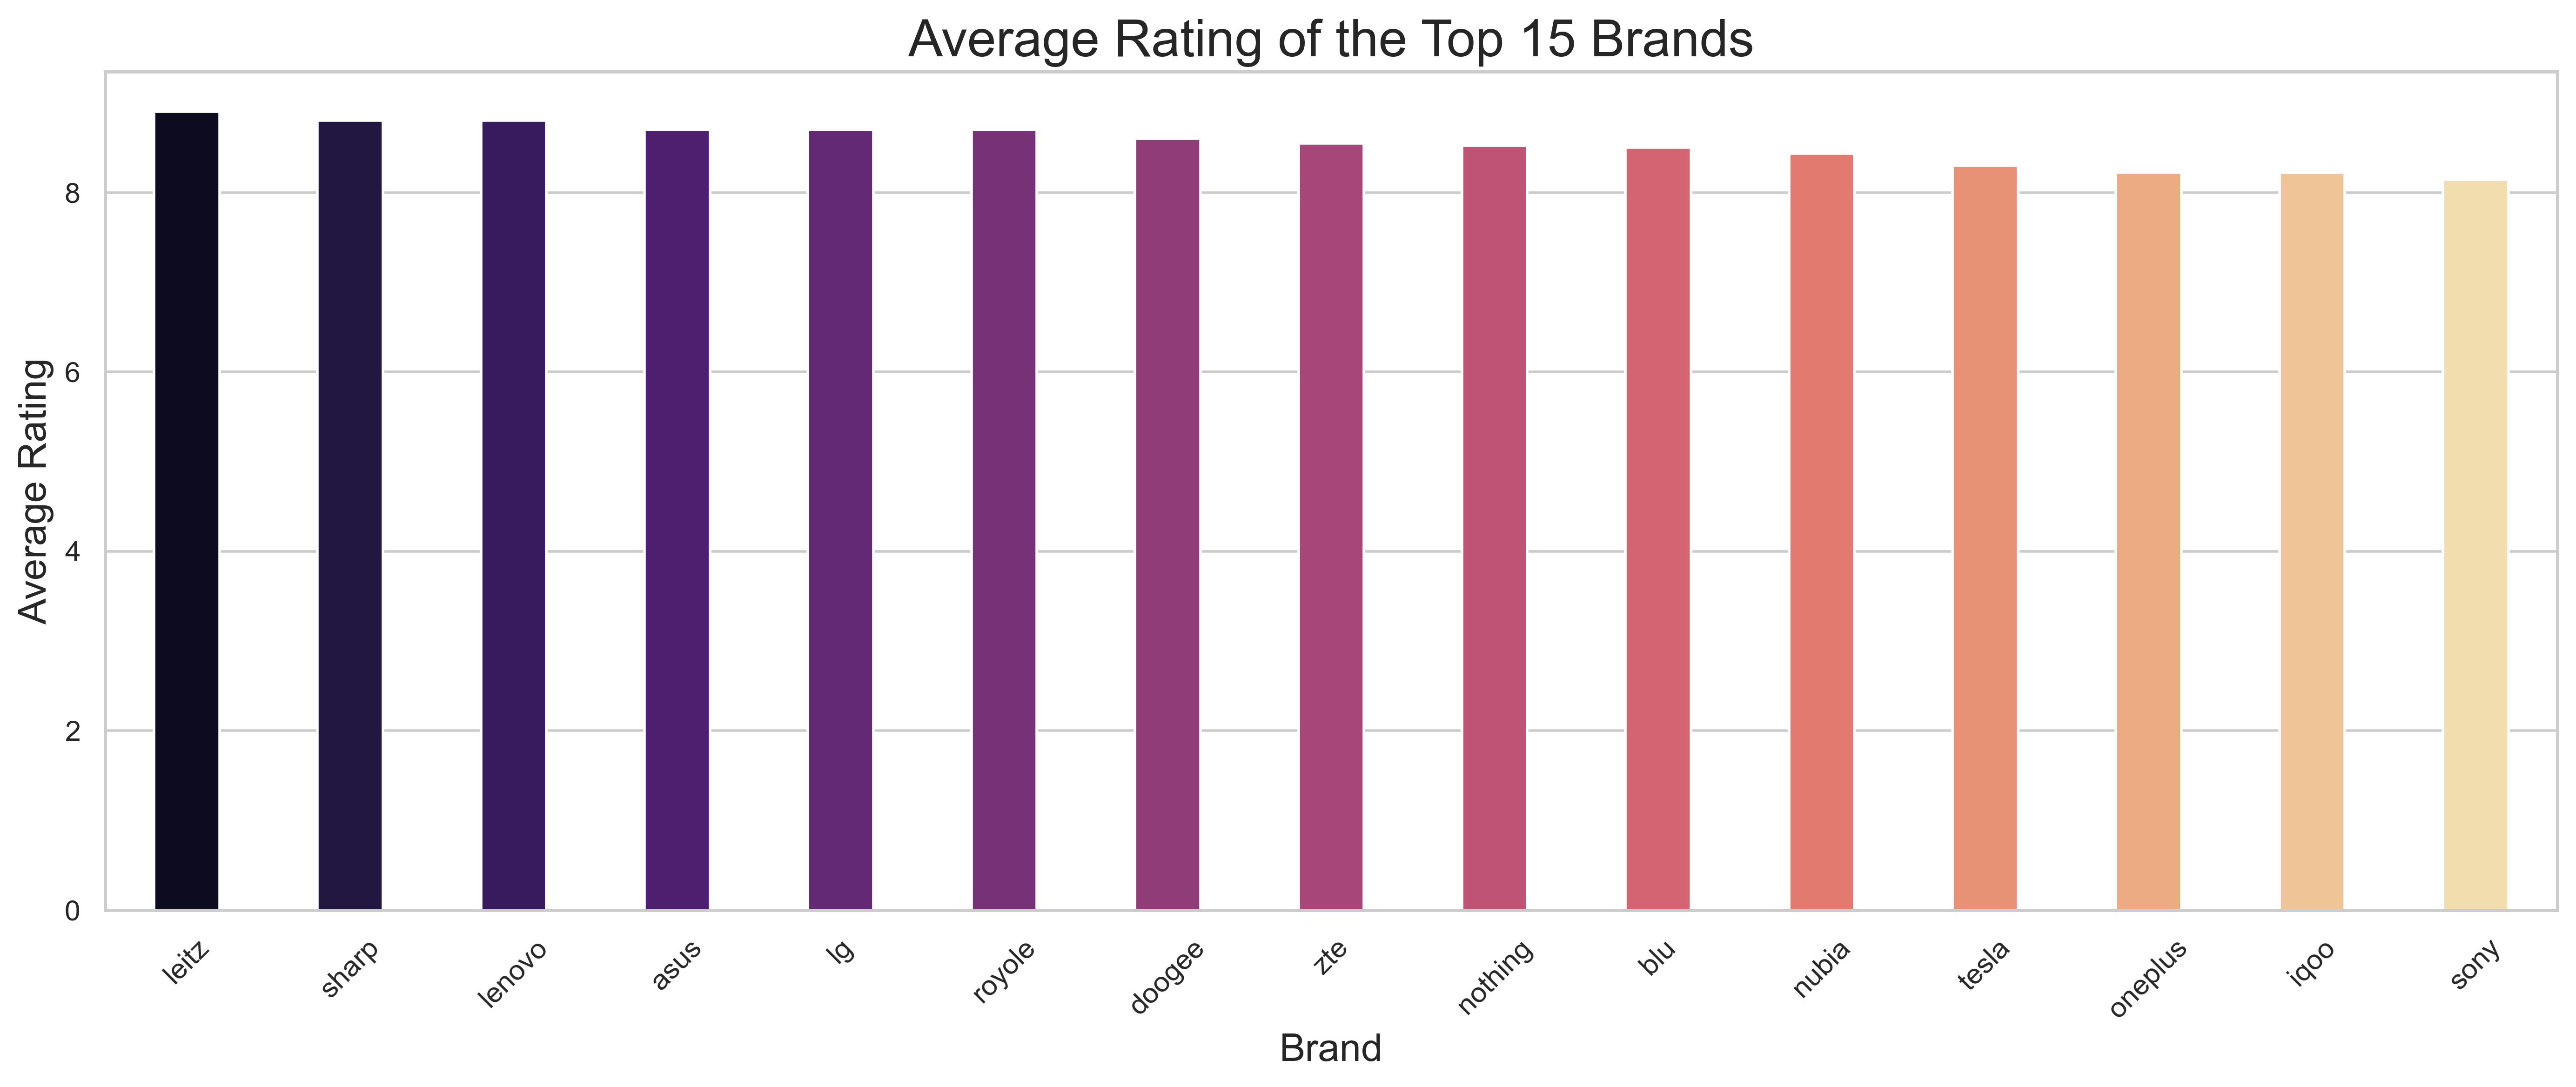

In [13]:
# Barplot for average rating for each brand
plt.figure(figsize=(14,6), dpi=400)

top_15_brands = avg_rating.head(15)

sns.barplot(data=top_15_brands, x='brand_name', y='avg_rating', width=0.4, palette='magma')

plt.xlabel('Brand', fontsize=15)
plt.ylabel('Average Rating', fontsize=15)
plt.title('Average Rating of the Top 15 Brands', fontsize=20)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

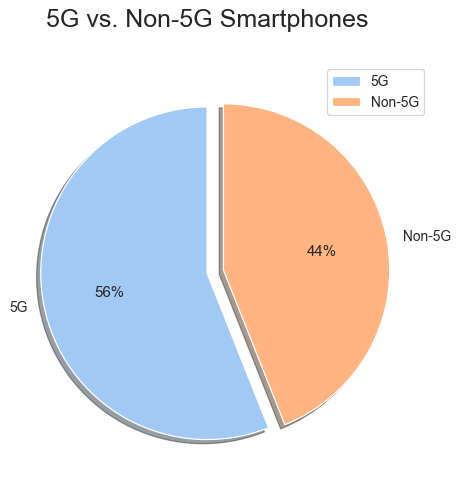

In [14]:
# Pie plot for how many smartphones have 5G
plt.figure(figsize=(14, 6), dpi=90)
palette_color = sns.color_palette('pastel')  # Change the color palette

explode = [0.1, 0]

plt.pie(
    smartphones_df['5G_or_not'].value_counts(),
    labels=['5G', 'Non-5G'],
    colors=palette_color,
    shadow=True,
    explode=explode,
    autopct='%.0f%%',
    startangle=90
)


plt.legend(loc=1)
plt.suptitle('5G vs. Non-5G Smartphones', fontsize=20)
plt.show()

In [15]:
# average price for each processor
process_brand_price = smartphones_df.groupby('processor_brand')['price'].mean().reset_index()
process_brand_price = process_brand_price.sort_values(by='price',ascending=False)
process_brand_price

,processor_brand,price
0,bionic,96921.555556
6,kirin,95699.857143
4,google,55505.333333
3,fusion,52990.000000
9,snapdragon,39763.104116
2,exynos,37841.520000
1,dimensity,26163.666667
5,helio,12458.587065
11,tiger,9095.333333
12,unisoc,8115.153846


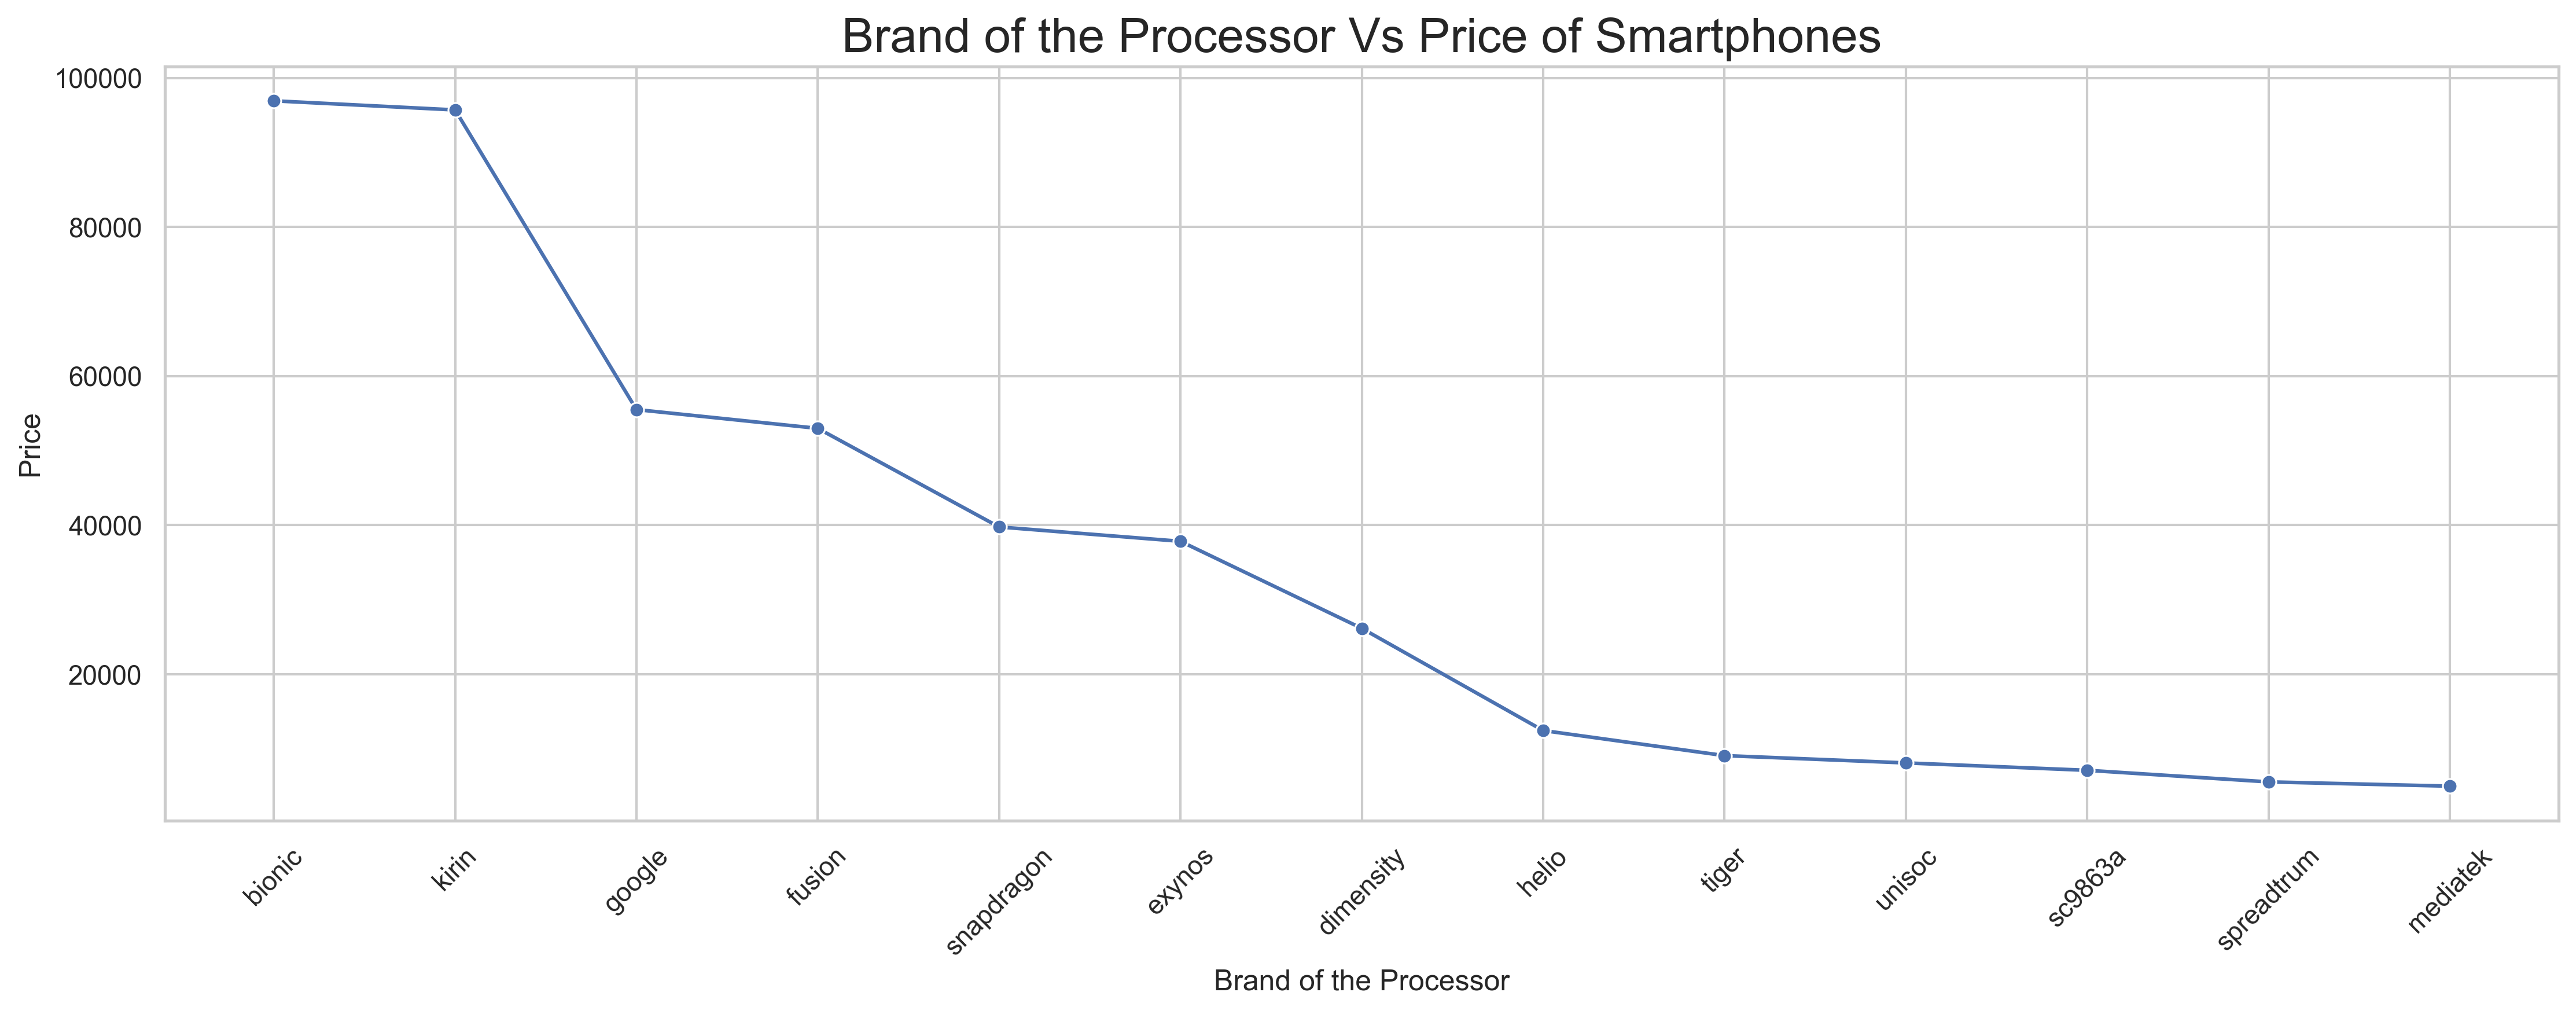

In [16]:
# Line plot for brand of the processor and average price of the smartphone
# figsize
plt.figure(figsize=(15, 6), dpi=300)

sns.lineplot(data=process_brand_price, x='processor_brand', y='price', marker='o')

plt.xlabel("Brand of the Processor", fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.title('Brand of the Processor Vs Price of Smartphones', fontsize=20)
plt.xticks(rotation=45)  # Rotate processor brand names for better visibility
plt.tight_layout()
plt.show()

In [17]:
# grouping by battery capacity to find the average price .
bat_cap_price = smartphones_df.groupby('battery_capacity')['price'].mean().reset_index()
bat_cap_price = bat_cap_price.sort_values(by='battery_capacity',ascending=False)
bat_cap_price.head()

,battery_capacity,price
88,22000.0,45999.0
87,21000.0,29990.0
86,9800.0,22990.0
85,8000.0,25899.0
84,7000.0,15797.5


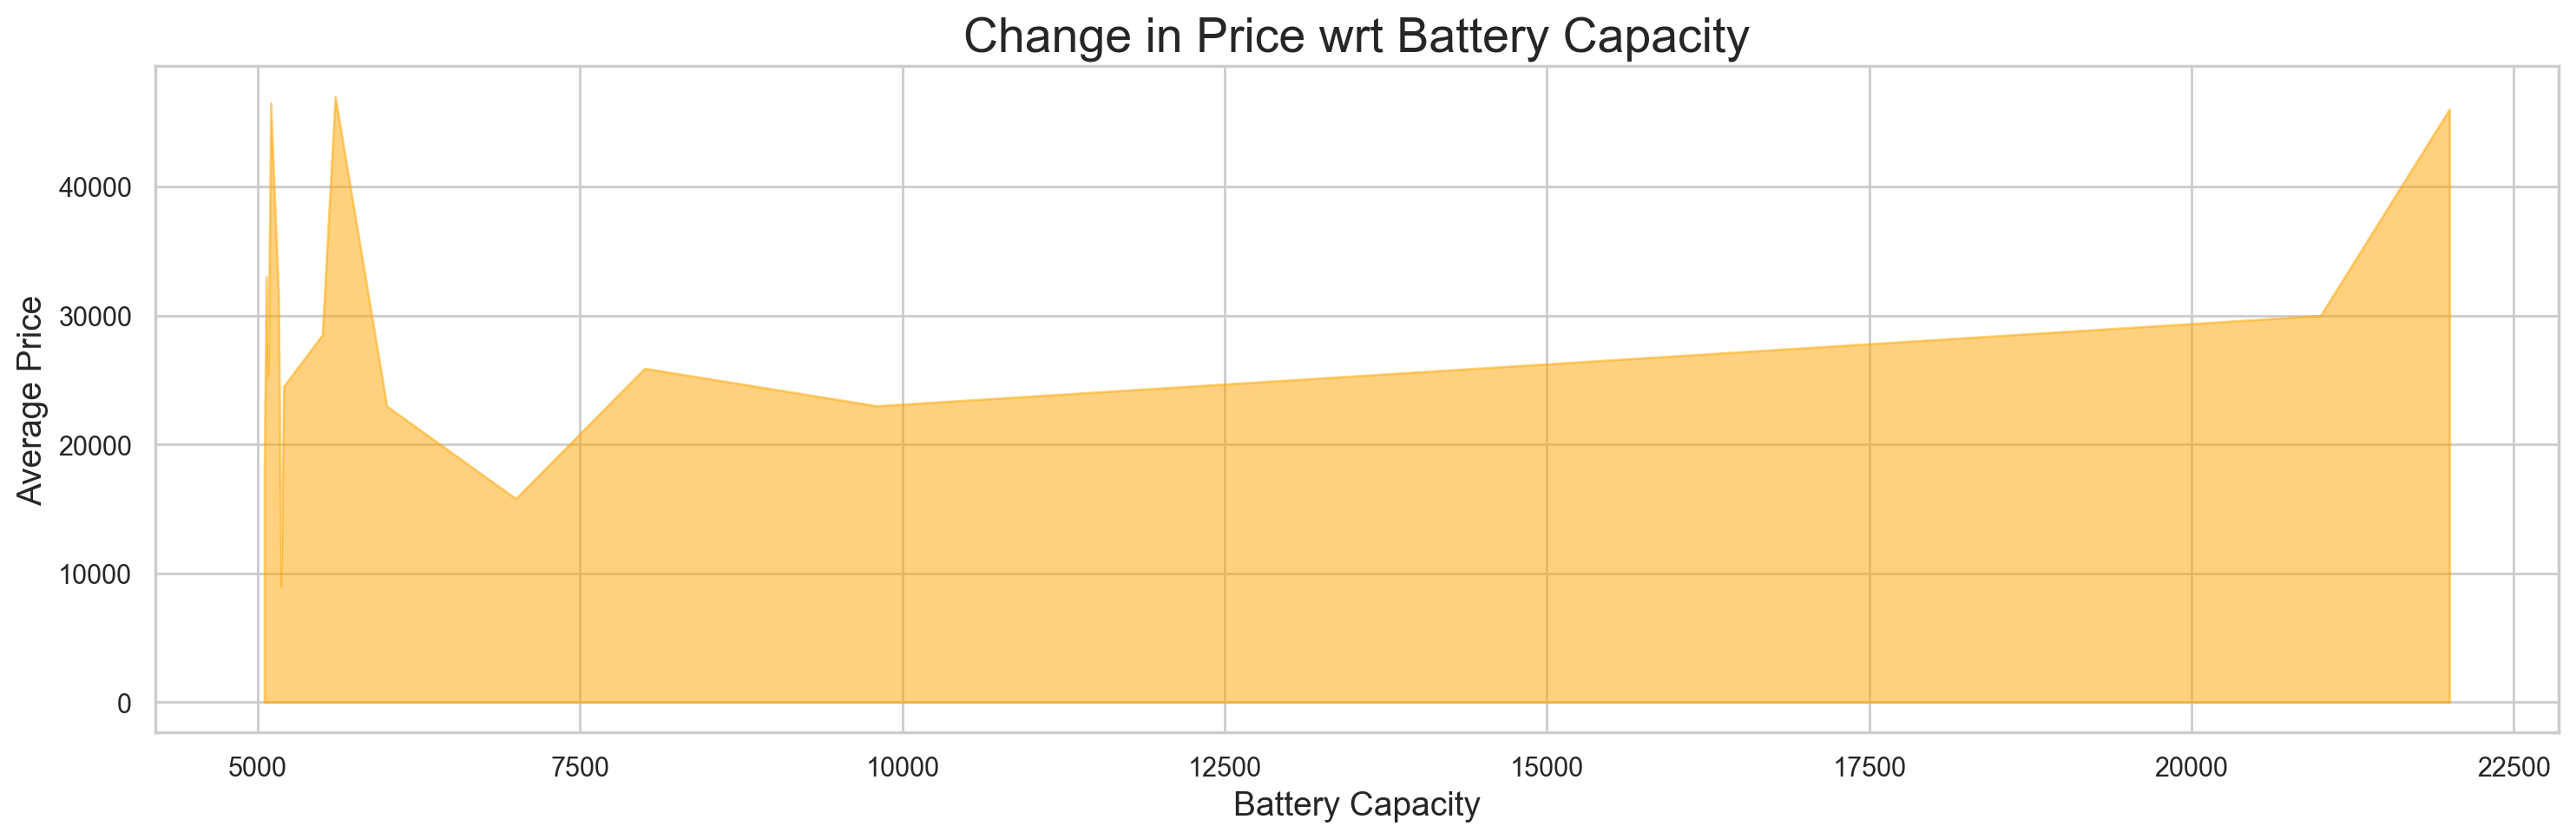

In [18]:
# Area plot to show the change in price for smartphones as the battery capacity changes.
# figsize
plt.figure(figsize=(15, 5), dpi=200)

bat_cap_price_sorted = bat_cap_price.head(15).sort_values('battery_capacity')
plt.fill_between(bat_cap_price_sorted['battery_capacity'], bat_cap_price_sorted['price'], color='orange', alpha=0.5)

plt.xlabel("Battery Capacity", fontsize=14)
plt.ylabel('Average Price', fontsize=14)
plt.title('Change in Price wrt Battery Capacity', fontsize=20)
plt.tight_layout()
plt.show()

In [19]:
bat_cap_brand = smartphones_df.groupby('brand_name')['battery_capacity'].max().reset_index()
bat_cap_brand = bat_cap_brand.sort_values(by='battery_capacity',ascending=False)
bat_cap_brand.head()

,brand_name,battery_capacity
6,doogee,22000.0
31,oukitel,21000.0
36,samsung,7000.0
40,tecno,7000.0
1,asus,6000.0


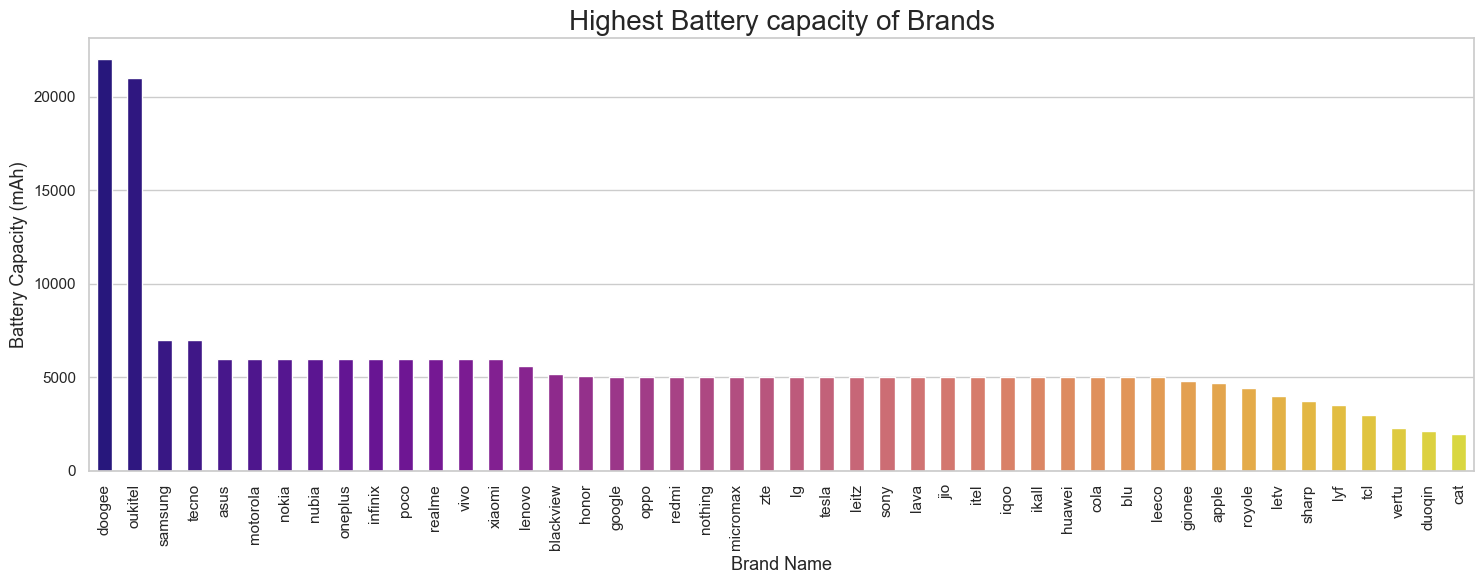

In [20]:
# Barplot to show the maximum battery capacity for each brand.
# figsize
plt.figure(figsize=(15,6))

sns.barplot(bat_cap_brand,x='brand_name',y='battery_capacity',width=0.5,palette='plasma')

plt.xticks(rotation=90)
plt.xlabel('Brand Name',fontsize=13)
plt.ylabel('Battery Capacity (mAh)',fontsize=13)
plt.title('Highest Battery capacity of Brands',fontsize=20)
plt.tight_layout()

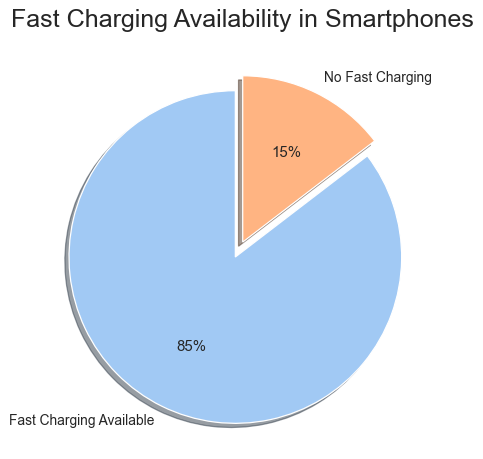

In [21]:
# Pie plot to show fast charging availability in smartphones.
# figsize
plt.figure(figsize=(14, 6), dpi=90)
palette_color = sns.color_palette('pastel')  # Use the 'pastel' color palette

# Explode values for separating sectors
explode = [0.1, 0]

plt.pie(
    smartphones_df['fast_charging_available'].value_counts(),
    labels=['Fast Charging Available', 'No Fast Charging'],
    colors=palette_color,
    shadow=True,
    explode=explode,
    autopct='%.0f%%',
    startangle=90
)

plt.title('Fast Charging Availability in Smartphones', fontsize=20)
plt.show()


In [22]:
# Grouping number of rear cameras and price
rear_camera_price = smartphones_df.groupby('num_rear_cameras')['price'].mean().reset_index()
rear_camera_price

,num_rear_cameras,price
0,1,21856.015385
1,2,23342.490385
2,3,36388.961887
3,4,35537.801282


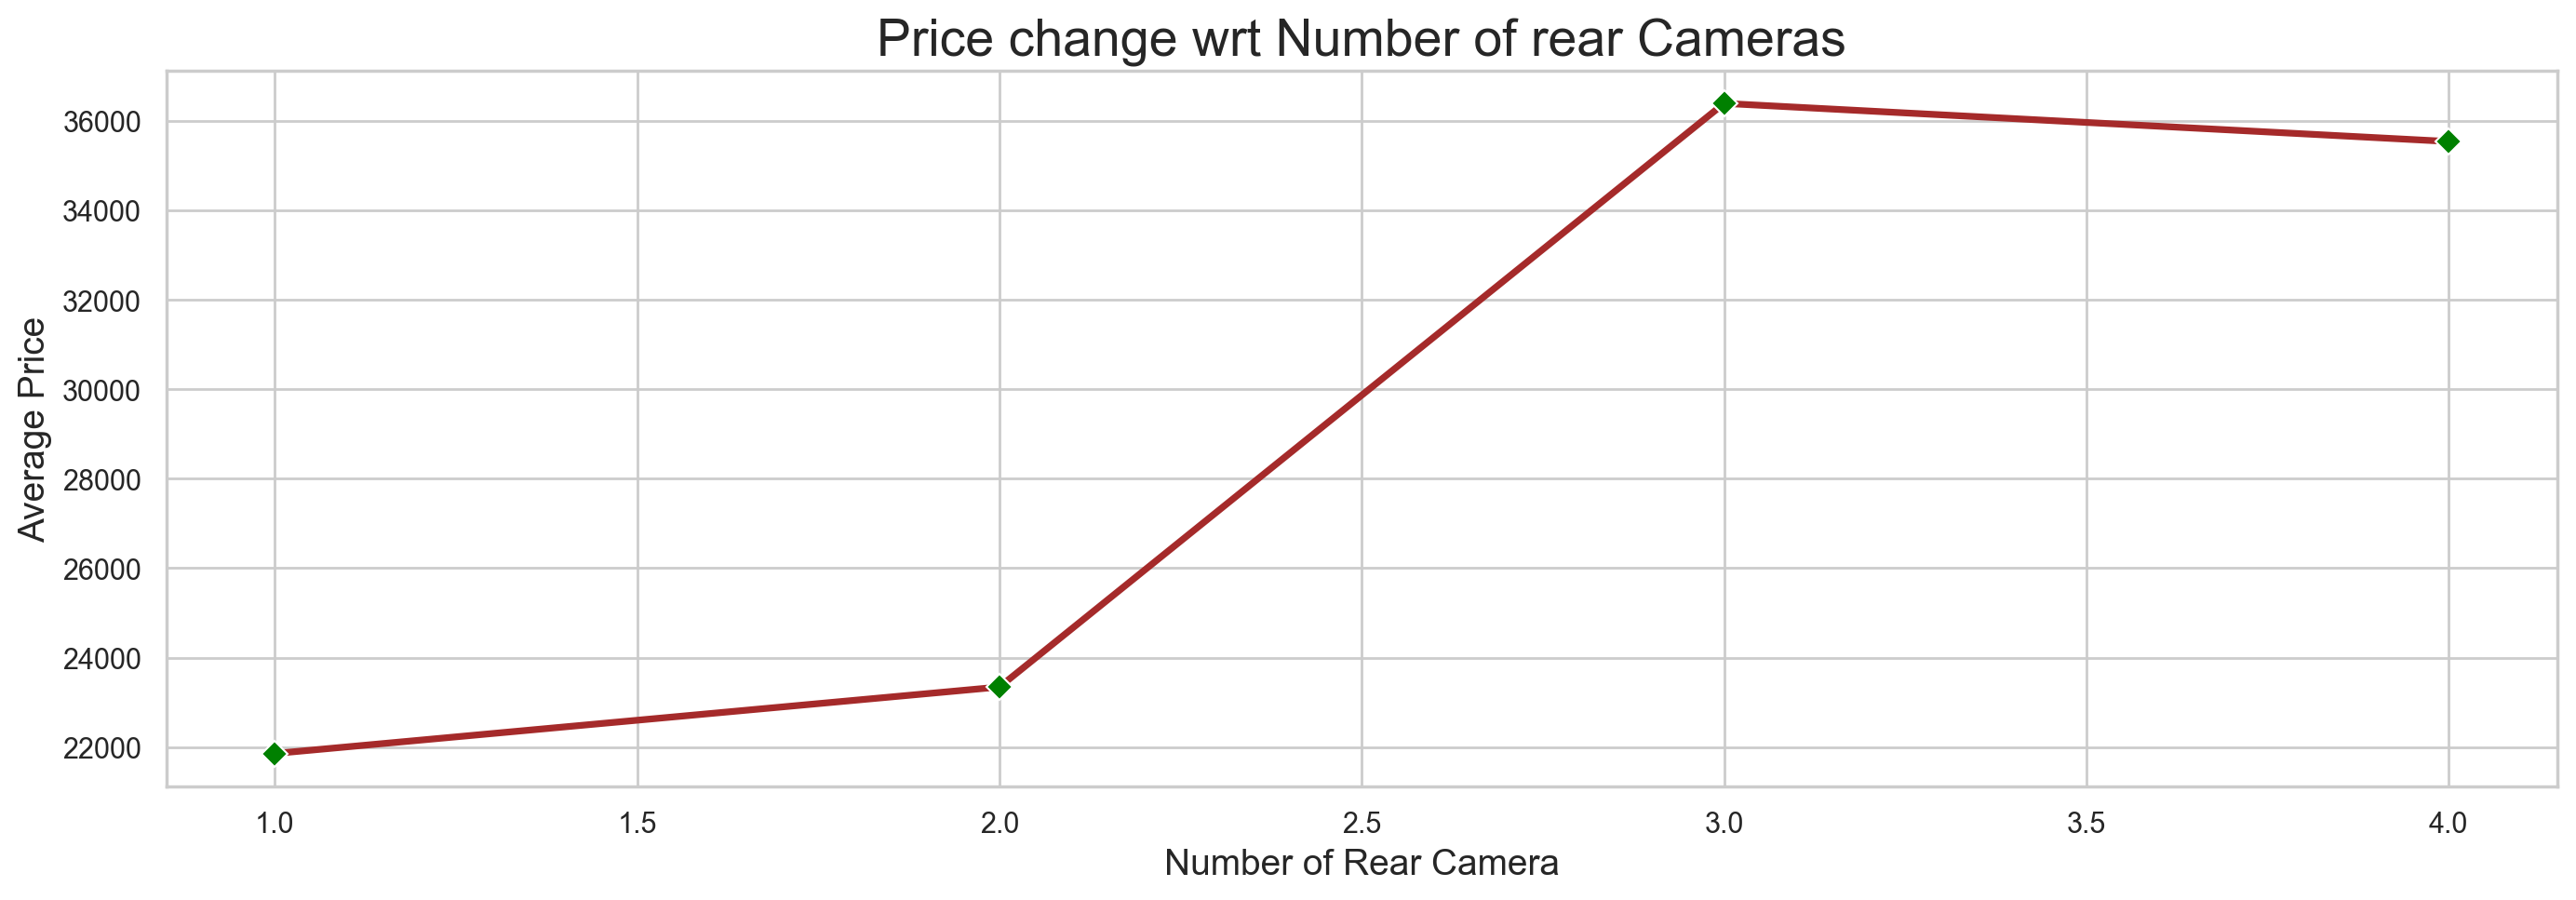

In [23]:
# Line plot to show the change in price wrt Number of rear cameras.
#figsize
plt.figure(figsize=(14,5),dpi=200)

sns.lineplot(rear_camera_price,x='num_rear_cameras',y='price',marker='D',color='brown',markersize=7, markerfacecolor='green',linewidth=2.6)

plt.xlabel("Number of Rear Camera",fontsize= 14)
plt.ylabel('Average Price',fontsize= 14)
plt.title('Price change wrt Number of rear Cameras',fontsize=20)
plt.tight_layout()
plt.show()

In [24]:
# Grouing the primery rear camera and price.
prim_rear_price = smartphones_df.groupby('primary_camera_rear')['price'].mean().reset_index()
prim_rear_price

,primary_camera_rear,price
0,2.0,5388.500000
1,5.0,7207.333333
2,8.0,7163.000000
3,12.0,71361.298246
4,12.2,24244.500000
5,13.0,16246.991379
6,16.0,22019.176471
7,20.0,14265.666667
8,24.0,30740.000000
9,40.0,214990.000000


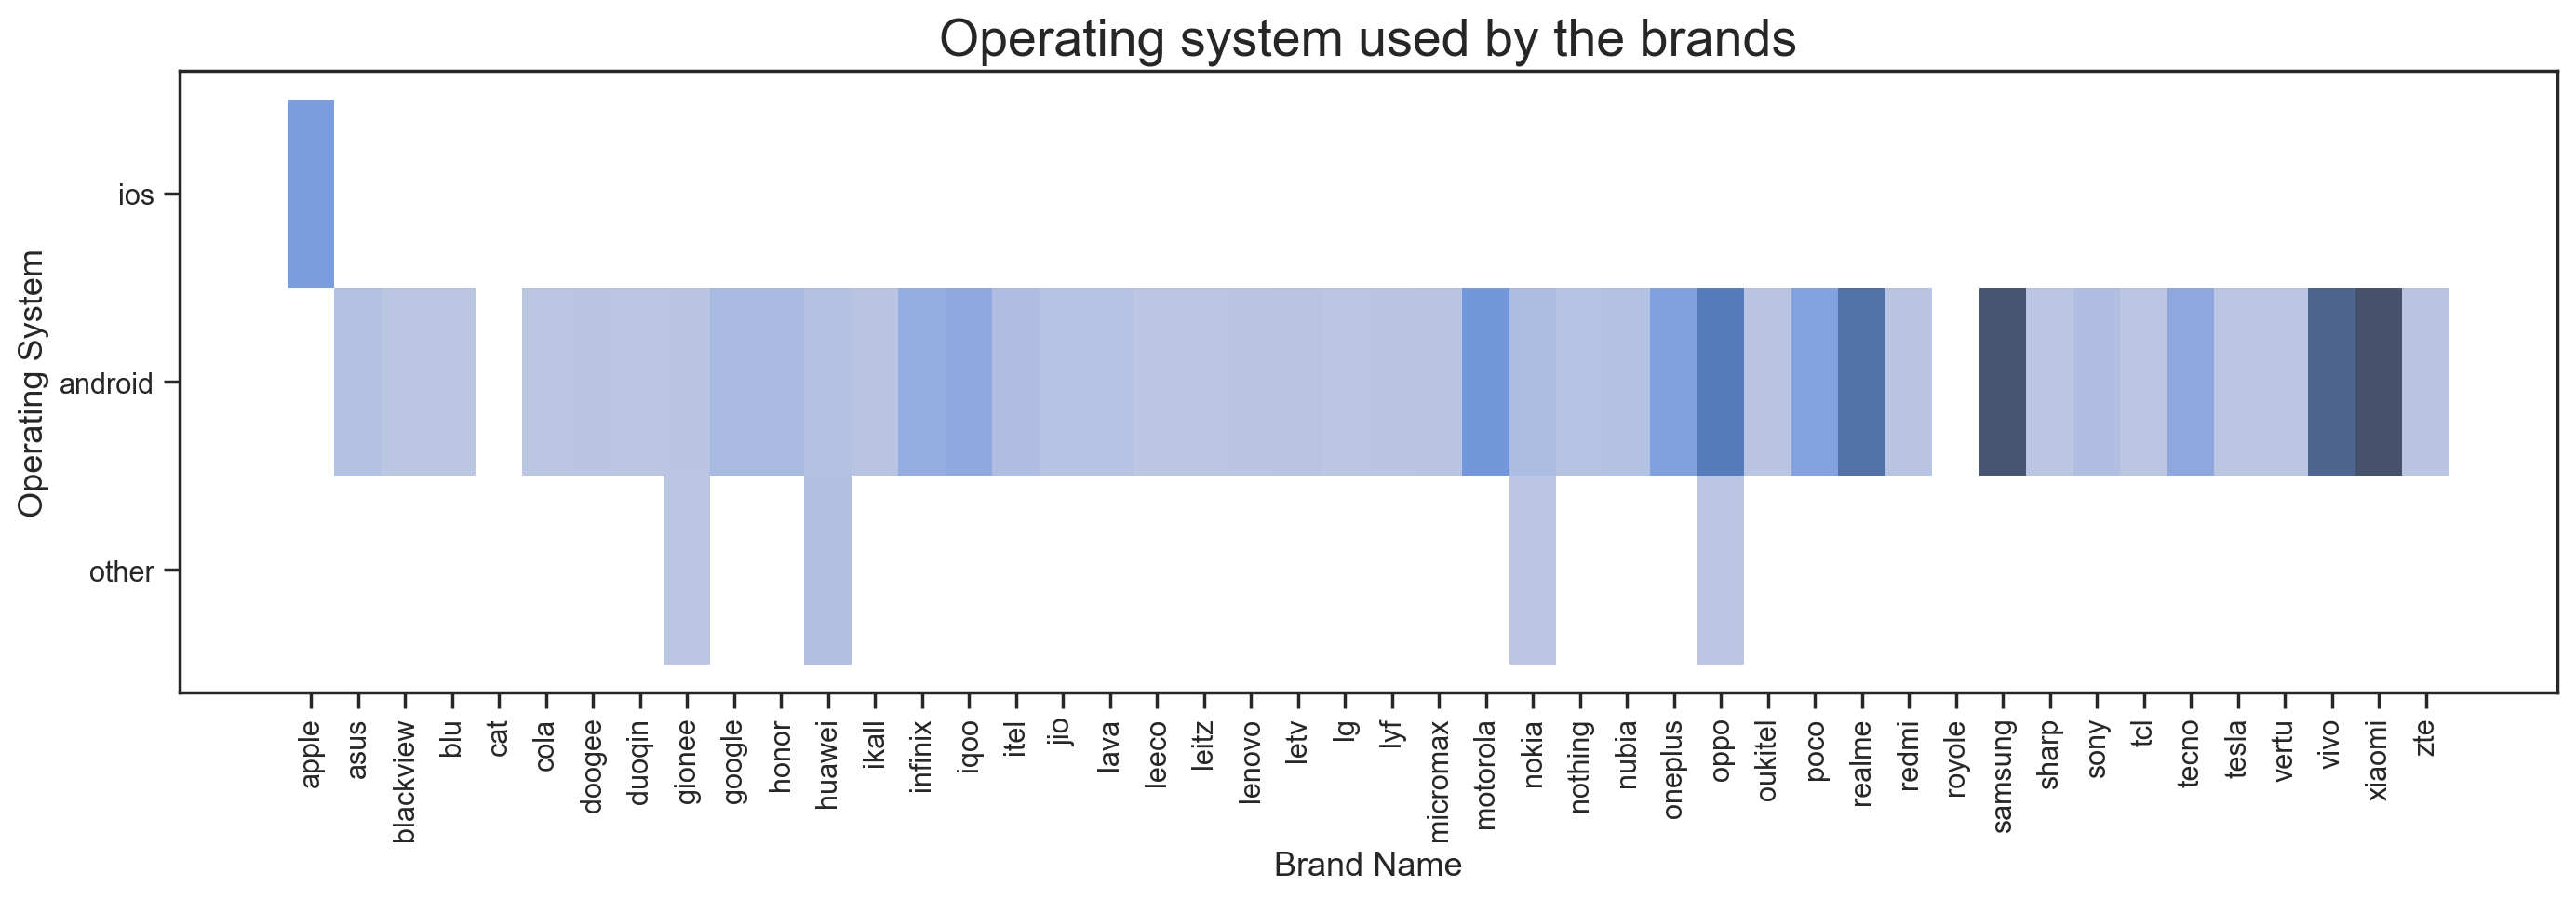

In [25]:
# Histplot to show Operatig system used in the brands.
# figsize
plt.figure(figsize=(14,5),dpi=200)
sns.set_style('ticks')

sns.histplot(smartphones_df,x='brand_name',y='os',binwidth=.3)

plt.xticks(rotation=90)
plt.xlabel('Brand Name',fontsize=13)
plt.ylabel('Operating System',fontsize=13)
plt.title('Operating system used by the brands',fontsize=20)
plt.tight_layout()
plt.show()

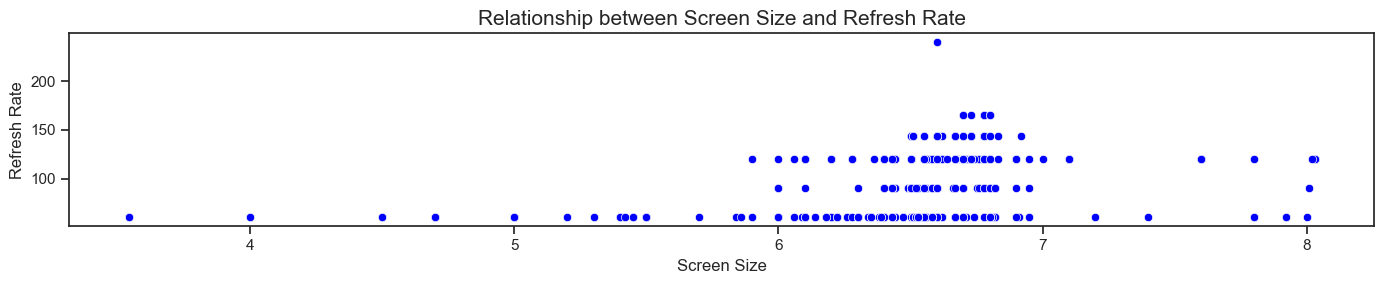

In [26]:
# Scatter plot for the relationship between 'screen_size' and 'refresh_rate'
plt.figure(figsize=(14, 3))


sns.scatterplot(data=smartphones_df, x='screen_size', y='refresh_rate', color='blue')


plt.xlabel('Screen Size', fontsize=12)
plt.ylabel('Refresh Rate', fontsize=12)
plt.title('Relationship between Screen Size and Refresh Rate', fontsize=15)
plt.tight_layout()

plt.show()

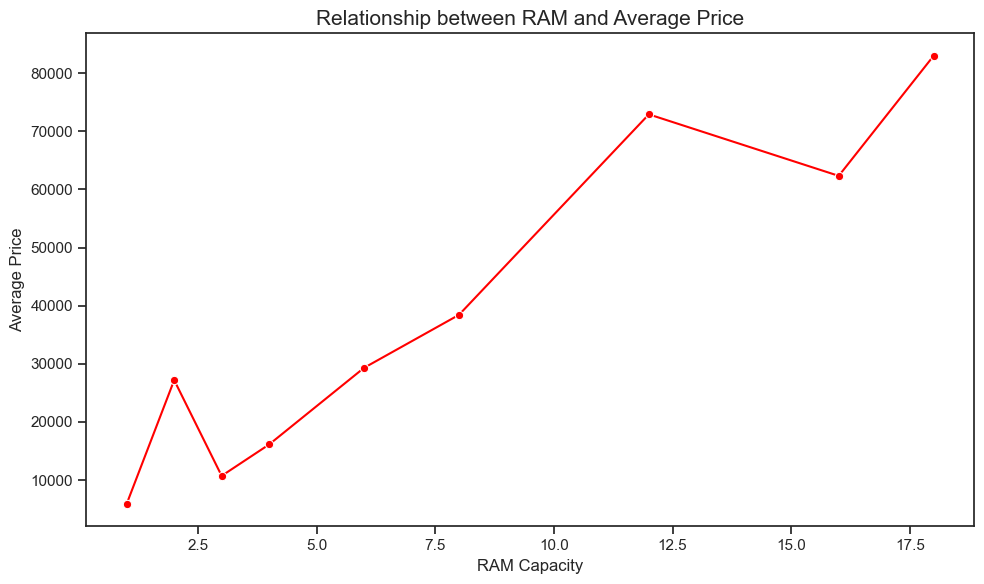

In [27]:
# Calculate the average price for each RAM capacity
avg_price_by_ram = smartphones_df.groupby('ram_capacity')['price'].mean().reset_index()

# Line plot to show the relationship between RAM and Average Price
plt.figure(figsize=(10, 6))
sns.lineplot(data=avg_price_by_ram, x='ram_capacity', y='price', marker='o', color='red')

plt.xlabel('RAM Capacity', fontsize=12)
plt.ylabel('Average Price', fontsize=12)
plt.title('Relationship between RAM and Average Price', fontsize=15)
plt.tight_layout()

plt.show()

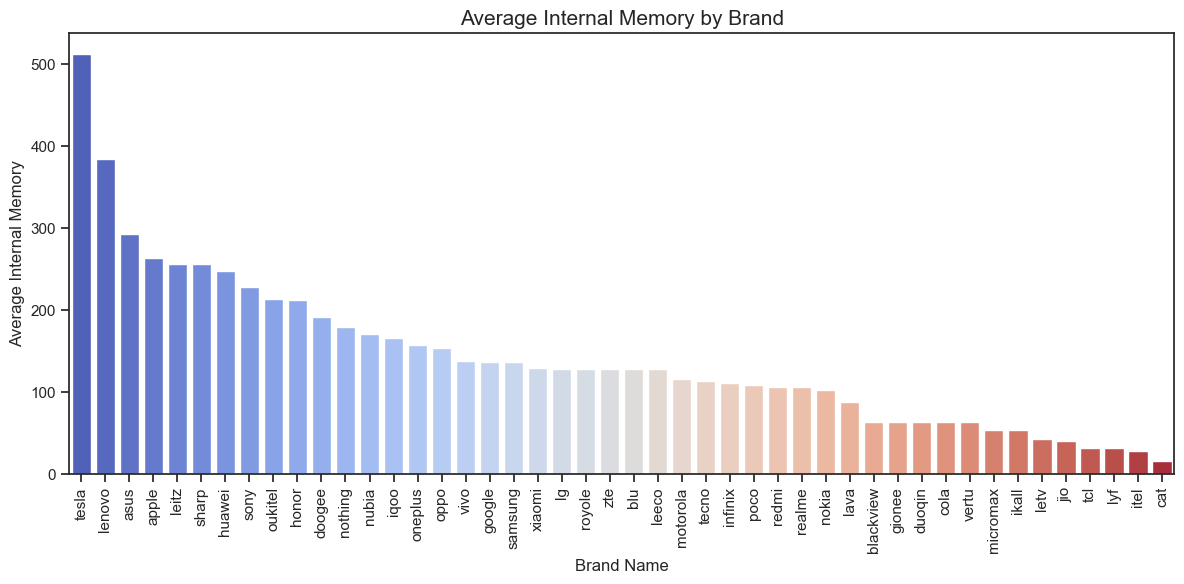

In [28]:
# Calculate the average internal memory for each brand
avg_internal_memory_by_brand = smartphones_df.groupby('brand_name')['internal_memory'].mean().reset_index()

# Sort the brands by average internal memory in descending order
avg_internal_memory_by_brand = avg_internal_memory_by_brand.sort_values(by='internal_memory', ascending=False)

# Bar plot to show the average internal memory for each brand
plt.figure(figsize=(12, 6))
sns.barplot(data=avg_internal_memory_by_brand, x='brand_name', y='internal_memory', palette='coolwarm')

plt.xlabel('Brand Name', fontsize=12)
plt.ylabel('Average Internal Memory', fontsize=12)
plt.title('Average Internal Memory by Brand', fontsize=15)
plt.xticks(rotation=90)
plt.tight_layout()

plt.show()


In [29]:
# Describe every column
smartphones_df.describe()

,price,avg_rating,5G_or_not,num_cores,processor_speed,battery_capacity,fast_charging_available,fast_charging,ram_capacity,internal_memory,screen_size,refresh_rate,num_rear_cameras,primary_camera_rear,primary_camera_front,extended_memory_available,resolution_height,resolution_width
count,980.000000,879.000000,980.000000,974.000000,938.000000,969.000000,980.000000,769.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,975.000000,980.000000,980.000000,980.000000
mean,32520.504082,7.825825,0.560204,7.772074,2.427217,4817.748194,0.854082,46.126138,6.560204,141.036735,6.536765,92.256122,2.814286,50.319286,16.589744,0.630612,2214.663265,1075.852041
std,39531.812669,0.740285,0.496616,0.836845,0.464090,1009.540054,0.353205,34.277870,2.744378,107.134516,0.349162,28.988052,0.776441,33.000968,10.876944,0.482885,516.484254,290.164931
min,3499.000000,6.000000,0.000000,4.000000,1.200000,1821.000000,0.000000,10.000000,1.000000,8.000000,3.540000,60.000000,1.000000,2.000000,0.000000,0.000000,480.000000,480.000000
25%,12999.000000,7.400000,0.000000,8.000000,2.050000,4500.000000,1.000000,18.000000,4.000000,64.000000,6.500000,60.000000,2.000000,24.000000,8.000000,0.000000,1612.000000,1080.000000
50%,19994.500000,8.000000,1.000000,8.000000,2.300000,5000.000000,1.000000,33.000000,6.000000,128.000000,6.580000,90.000000,3.000000,50.000000,16.000000,1.000000,2400.000000,1080.000000
75%,35491.500000,8.400000,1.000000,8.000000,2.840000,5000.000000,1.000000,66.000000,8.000000,128.000000,6.670000,120.000000,3.000000,64.000000,16.000000,1.000000,2408.000000,1080.000000
max,650000.000000,8.900000,1.000000,8.000000,3.220000,22000.000000,1.000000,240.000000,18.000000,1024.000000,8.030000,240.000000,4.000000,200.000000,60.000000,1.000000,3840.000000,2460.000000


In [30]:
# sum of missing values in each column
smartphones_df.isna().sum()

brand_name                     0
model                          0
price                          0
avg_rating                   101
5G_or_not                      0
processor_brand               20
num_cores                      6
processor_speed               42
battery_capacity              11
fast_charging_available        0
fast_charging                211
ram_capacity                   0
internal_memory                0
screen_size                    0
refresh_rate                   0
num_rear_cameras               0
os                            14
primary_camera_rear            0
primary_camera_front           5
extended_memory_available      0
resolution_height              0
resolution_width               0
dtype: int64

<p>The columns with missing value are <b>avg_rating, processor_brand, num_cores, processor_speed, battery_capacity, fast_charging, os, primary_camera_front</b>.</p>

In [31]:
# Calculate the mean of all available avg_rating values
mean_avg_rating = smartphones_df['avg_rating'].mean()

# Fill the missing values with the mean
smartphones_df['avg_rating'].fillna(mean_avg_rating, inplace=True)

In [32]:
mode_processor_brand = smartphones_df['processor_brand'].mode()[0]
smartphones_df['processor_brand'].fillna(mode_processor_brand, inplace=True)

In [33]:
mean_processor_speed = smartphones_df['processor_speed'].mean()
smartphones_df['processor_speed'].fillna(mean_processor_speed, inplace=True)

In [34]:
mean_num_cores = smartphones_df['num_cores'].mean()
smartphones_df['num_cores'].fillna(mean_num_cores, inplace=True)

In [35]:
mean_battery_capacity = smartphones_df['battery_capacity'].mean()
smartphones_df['battery_capacity'].fillna(mean_battery_capacity, inplace=True)

In [36]:
random_fast_charging = np.random.choice([0, 1], size=211, p=[0.5, 0.5])
smartphones_df.loc[smartphones_df['fast_charging'].isnull(), 'fast_charging'] = random_fast_charging

In [37]:
# Find the mode of the 'os' column (categorical data)
mode_os = smartphones_df['os'].mode()[0]

# Replace missing values in the 'os' column with the mode value
smartphones_df['os'].fillna(mode_os, inplace=True)

In [38]:
# Calculate the mean of the 'primary_camera_front' column
mean_primary_camera_front = smartphones_df['primary_camera_front'].mean()

# Replace missing values in the 'primary_camera_front' column with the mean value
smartphones_df['primary_camera_front'].fillna(mean_primary_camera_front, inplace=True)

In [39]:
smartphones_df.isna().sum()

brand_name                   0
model                        0
price                        0
avg_rating                   0
5G_or_not                    0
processor_brand              0
num_cores                    0
processor_speed              0
battery_capacity             0
fast_charging_available      0
fast_charging                0
ram_capacity                 0
internal_memory              0
screen_size                  0
refresh_rate                 0
num_rear_cameras             0
os                           0
primary_camera_rear          0
primary_camera_front         0
extended_memory_available    0
resolution_height            0
resolution_width             0
dtype: int64

In [40]:
smartphones_df.to_csv('smartphones_preprocessed.csv', index=False)